In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

cristianjsanchez_dataset_path = kagglehub.dataset_download('cristianjsanchez/dataset')

print('Data source import complete.')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FuncFormatter

In [ ]:
df=pd.read_csv('/DATASET.csv')
df.head()

,Transaction ID,Originator,Originator_ID,EntryDate,InputOutput,Market,Product ISIN,Product Type,Product Class,Normalized Amount,Currency,Anomaly
0,I9Q3S5YYLCQX,Client_087,_XID,2019-01-01 17:55:33,Sell,Market2,ISN-X01-LRBXBXN,FutureCommodity,Trade,10317357.93,Currency1,0
1,VFZ6INAXVYJV,Client_019,_XID,2019-01-01 18:52:34,Sell,Market1,ISN-X01-856Z8OC,FX,Trade,31042.04,Currency2,0
2,HXOA8DNPX1OE,Client_385,_XID,2019-01-01 15:21:09,Sell,Market1,ISN-X01-5CW2HUF,SimpleTransfer,Trade,35910.53,Currency1,0
3,O9W5IR932XT1,Client_276,_XID,2019-01-01 20:02:36,Sell,Market1,ISN-X01-AQ848H7,FutureEquity,Trade,79630.92,Currency2,0
4,84KF31TPK1LU,Client_049,_XID,2019-01-01 09:06:58,Buy,Market1,ISN-X01-7JWB2C7,FX,Trade,434370.69,Currency1,0


In [ ]:
print('Duplicados dataset original: ', df.duplicated().sum())

Duplicados dataset original:  0


In [ ]:
print('Nulos dataset original:', df.isnull().sum())

Nulos dataset original: Transaction ID       0
Originator           0
Originator_ID        0
EntryDate            0
InputOutput          0
Market               0
Product ISIN         0
Product Type         0
Product Class        0
Normalized Amount    0
Currency             0
Anomaly              0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


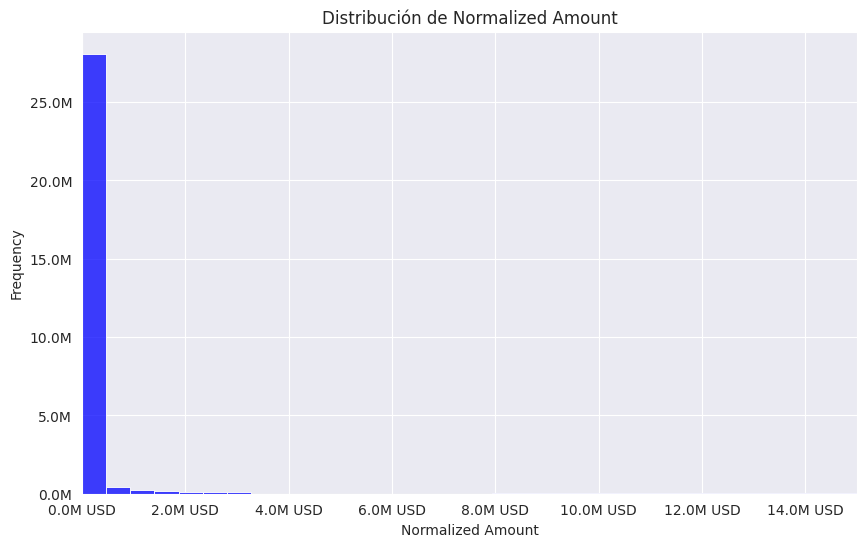

In [ ]:
def millones(x, pos):
    return f'{x*1e-6:.1f}M'

def millones2(x, pos):
    return f'{x*1e-6:.1f}M USD'

sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['Normalized Amount'], bins=80, color='blue')

ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.xaxis.set_major_formatter(FuncFormatter(millones2))
ax.yaxis.set_major_formatter(FuncFormatter(millones))

plt.xlim(0, 15000000)

plt.xlabel('Normalized Amount')
plt.ylabel('Frequency')
plt.title('Distribución de Normalized Amount')
plt.show()

In [ ]:
percentage_below_1M = (df[df['Normalized Amount'] < 1000000].shape[0] / df.shape[0]) * 100

percentage_below_40K = (df[df['Normalized Amount'] < 40000].shape[0] / df.shape[0]) * 100

print(f"El {percentage_below_1M:.2f}% de las transacciones tienen un monto menor a 1M USD,")
print(f"y el {percentage_below_40K:.2f}% de ellas tienen un monto menor a 40K USD.")

El 96.02% de las transacciones tienen un monto menor a 1M USD,
y el 57.17% de ellas tienen un monto menor a 40K USD.


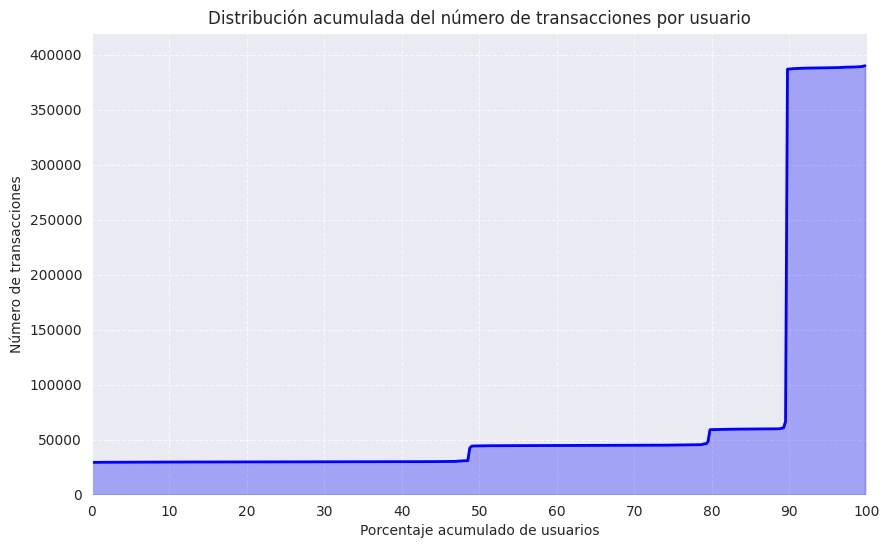

In [ ]:
transactions_per_user = df.groupby('Originator')['Normalized Amount'].count()
transactions_per_user_sorted = transactions_per_user.sort_values(ascending=False)
cumulative_percentage = (1 - transactions_per_user_sorted.rank(method='first', ascending=False) / len(transactions_per_user_sorted)) * 100

sns.set_style("darkgrid")

plt.figure(figsize=(10, 6))
plt.fill_between(cumulative_percentage, transactions_per_user_sorted.values, color='blue', alpha=0.3)
plt.plot(cumulative_percentage, transactions_per_user_sorted.values, color='blue', lw=2, linestyle='-')


plt.title('Distribución acumulada del número de transacciones por usuario')
plt.xlabel('Porcentaje acumulado de usuarios')
plt.ylabel('Número de transacciones')

plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.grid(True, linestyle='--', alpha=0.7)

plt.gca().get_yaxis().get_major_formatter().set_scientific(False)
plt.xlim(0, 100)
plt.ylim(0, 420000)
plt.show()

In [ ]:
transactions_per_user_sorted

Originator
Client_039    390050
Client_036    389495
Client_026    389168
Client_024    389043
Client_014    388965
               ...  
Client_198     29447
Client_107     29444
Client_139     29414
Client_093     29407
Client_089     29258
Name: Normalized Amount, Length: 400, dtype: int64

In [ ]:
total_transactions_df = df['Transaction ID'].count()
df['num_transactions_proportion'] = 1 / total_transactions_df

df['EntryDate'] = pd.to_datetime(df['EntryDate'])
df['Weekday'] = df['EntryDate'].dt.weekday
df['Hour'] = df['EntryDate'].dt.hour

df['Morning'] = df['Hour'].apply(lambda x: 1 if 6 <= x < 12 else 0)  # Mañana (6:00 - 11:59)
df['Evening'] = df['Hour'].apply(lambda x: 1 if 12 <= x < 18 else 0)  # Tarde (12:00 - 17:59)
df['Night'] = df['Hour'].apply(lambda x: 1 if 18 <= x < 24 or 0 <= x < 6 else 0)  # Noche (18:00 - 23:59), (00:00 - 5:59)

condition_round_amount = ((df['Normalized Amount'].apply(lambda x: str(x).count('000.0')) >= 1) & (df['Normalized Amount'] == df['Normalized Amount'].round()))
df['Round_Amount_Condition'] = condition_round_amount.astype(int)

condition_small_amount = ((df['Normalized Amount'] < 1177.44) & (df['Normalized Amount'] > 420.65) & (df['Product Class'] == 'Cash in / out (withdrawal), Security in / out'))
df['Small_Amount_Condition'] = condition_small_amount

condition_sell = df['InputOutput'] == 'Sell'
df['Sell_Condition'] = condition_sell
condition_buy = df['InputOutput'] == 'Buy'
df['Buy_Condition'] = condition_buy

inoutdelta = (df['InputOutput'] == 'Buy').astype(int) - (df['InputOutput'] == 'Sell').astype(int)
df['InputOutput_Delta'] = inoutdelta

condition_sell_cash = df['Normalized Amount'].where(condition_sell & (df['Product Class'] == 'Cash in / out (withdrawal), Security in / out'), 0)
df['condition_sell_cash'] = condition_sell_cash

condition_sell_cash2 = df['Normalized Amount'].where(condition_sell & (df['Product Type'] == 'SimpleTransfer'), 0)
df['condition_sell_cash2'] = condition_sell_cash2

aggregated_df = df.groupby(['Originator', 'Weekday', 'Hour', 'Morning', 'Evening', 'Night', 'Anomaly']).agg(
    num_transactions=('num_transactions_proportion', 'count'),
    total_amount_traded=('Normalized Amount', 'sum'),
    transactions_count_small_amount=('Small_Amount_Condition', 'sum'),
    transactions_count_round_amount=('Round_Amount_Condition', 'sum'),
    transactions_count_amount_sell=('Sell_Condition', 'sum'),
    transactions_count_amount_buy=('Buy_Condition', 'sum'),
    cash_out_withdrawal_security_out=('condition_sell_cash', 'sum'),
    simpletranfer=('condition_sell_cash2', 'sum'),
    inputoutput_delta=('InputOutput_Delta', 'sum')
).reset_index()

df.drop(columns=['Weekday', 'Hour', 'Morning', 'Evening', 'Night', 'Round_Amount_Condition', 'Small_Amount_Condition', 'Sell_Condition', 'Buy_Condition', 'InputOutput_Delta', 'condition_sell_cash', 'condition_sell_cash2','num_transactions_proportion'], inplace=True)

In [ ]:
aggregated_df.head(10)

,Originator,Weekday,Hour,Morning,Evening,Night,Anomaly,num_transactions,total_amount_traded,transactions_count_small_amount,transactions_count_round_amount,transactions_count_amount_sell,transactions_count_amount_buy,cash_out_withdrawal_security_out,simpletranfer,inputoutput_delta
0,Client_001,0,0,0,0,1,0,7,2.697422e+06,1,0,4,3,50517.36,51875.82,-1
1,Client_001,0,1,0,0,1,0,3,1.436519e+06,0,0,2,1,0.00,0.00,-1
2,Client_001,0,2,0,0,1,0,9,2.780018e+05,0,0,5,4,47436.03,454.04,-1
3,Client_001,0,3,0,0,1,0,11,4.021485e+05,0,0,6,5,34542.54,82329.73,-1
4,Client_001,0,4,0,0,1,0,11,1.504425e+07,1,0,4,7,0.00,0.00,3
5,Client_001,0,5,0,0,1,0,12,2.900135e+06,0,0,7,5,0.00,32782.70,-2
6,Client_001,0,6,1,0,0,0,7,1.719008e+05,1,0,5,2,581.05,656.11,-3
7,Client_001,0,7,1,0,0,0,430,1.121335e+08,14,0,182,248,980452.25,829255.41,66
8,Client_001,0,8,1,0,0,0,458,1.138423e+08,9,0,219,239,20441426.72,29282488.58,20
9,Client_001,0,9,1,0,0,0,457,1.738604e+08,10,0,215,242,20743247.65,1429956.39,27


In [ ]:
aggregated_df.num_transactions.sum()

29704090

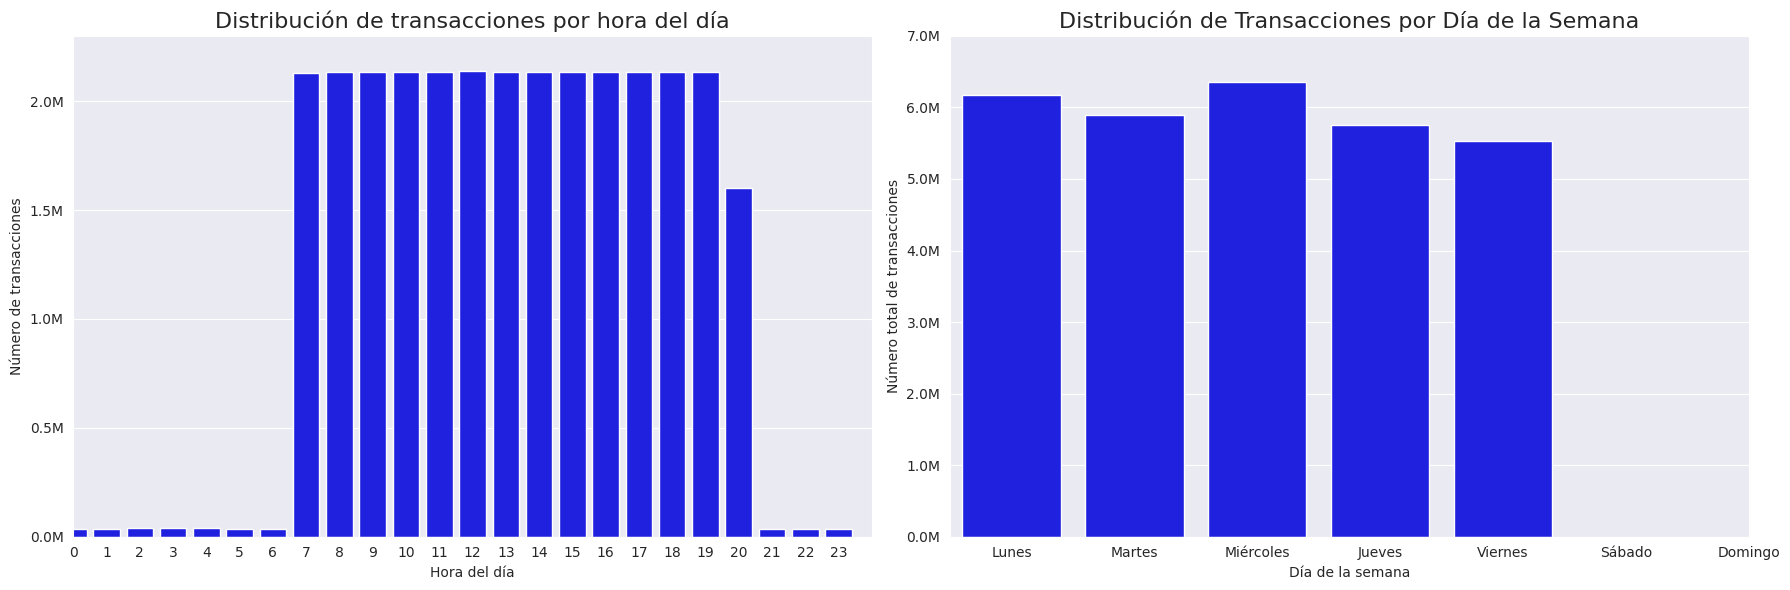

In [ ]:
sns.set_style("darkgrid")

transactions_per_hour = aggregated_df.groupby('Hour')['num_transactions'].sum()
transactions_per_weekday = aggregated_df.groupby('Weekday')['num_transactions'].sum()

def millones(x, pos):
    return f'{x*1e-6:.1f}M'

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(x=transactions_per_hour.index, y=transactions_per_hour.values, color='blue', ax=axes[0])
axes[0].set_title('Distribución de transacciones por hora del día', fontsize=16)
axes[0].set_xlabel('Hora del día')
axes[0].set_ylabel('Número de transacciones')
axes[0].yaxis.set_major_formatter(FuncFormatter(millones))
axes[0].set_xlim(0, 24)
axes[0].set_ylim(0, 2300000)

sns.barplot(x=transactions_per_weekday.index, y=transactions_per_weekday.values, color='blue', ax=axes[1])
axes[1].set_title('Distribución de Transacciones por Día de la Semana', fontsize=16)
axes[1].set_xlabel('Día de la semana')
axes[1].set_ylabel('Número total de transacciones')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
axes[1].yaxis.set_major_formatter(FuncFormatter(millones))
axes[1].set_ylim(0, 7000000)

plt.tight_layout()
plt.show()

In [ ]:
aggregated_df.groupby('Weekday')['num_transactions'].sum()

Weekday
0    6174920
1    5895267
2    6351232
3    5747803
4    5534868
Name: num_transactions, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


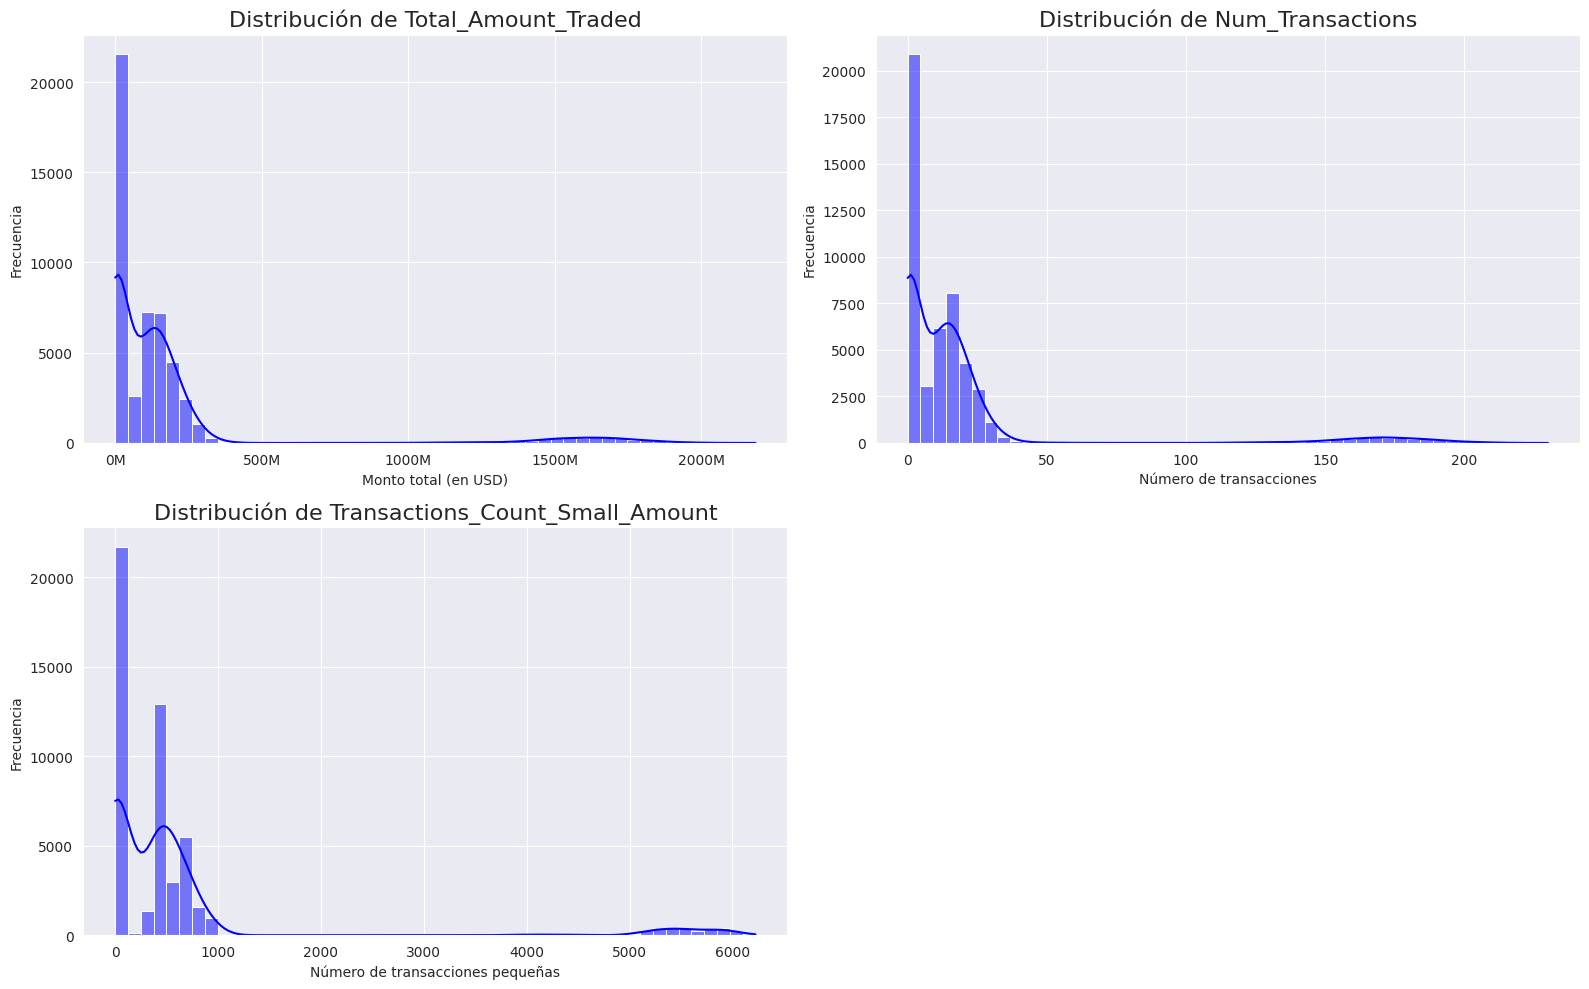

In [ ]:
def millones(x, pos):
    return f'{x*1e-6:.0f}M'

sns.set_style("darkgrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.histplot(aggregated_df['total_amount_traded'], bins=50, kde=True, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Total_Amount_Traded', fontsize=16)
axes[0, 0].set_xlabel('Monto total (en USD)')
axes[0, 0].set_ylabel('Frecuencia')
axes[0, 0].xaxis.set_major_formatter(FuncFormatter(millones))

sns.histplot(aggregated_df['transactions_count_small_amount'], bins=50, kde=True, color='blue', ax=axes[0, 1])
axes[1, 0].set_title('Distribución de Transactions_Count_Small_Amount', fontsize=16)
axes[1, 0].set_xlabel('Número de transacciones pequeñas')
axes[1, 0].set_ylabel('Frecuencia')

sns.histplot(aggregated_df['num_transactions'], bins=50, kde=True, color='blue', ax=axes[1, 0])
axes[0, 1].set_title('Distribución de Num_Transactions', fontsize=16)
axes[0, 1].set_xlabel('Número de transacciones')
axes[0, 1].set_ylabel('Frecuencia')

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
anomaly_counts = aggregated_df.groupby('Anomaly').size().reset_index(name='Cantidad')
print(anomaly_counts)

   Anomaly  Cantidad
0        0     47990
1        1       631
2        2       511
3        3       282
4        4       254
5        5       252


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

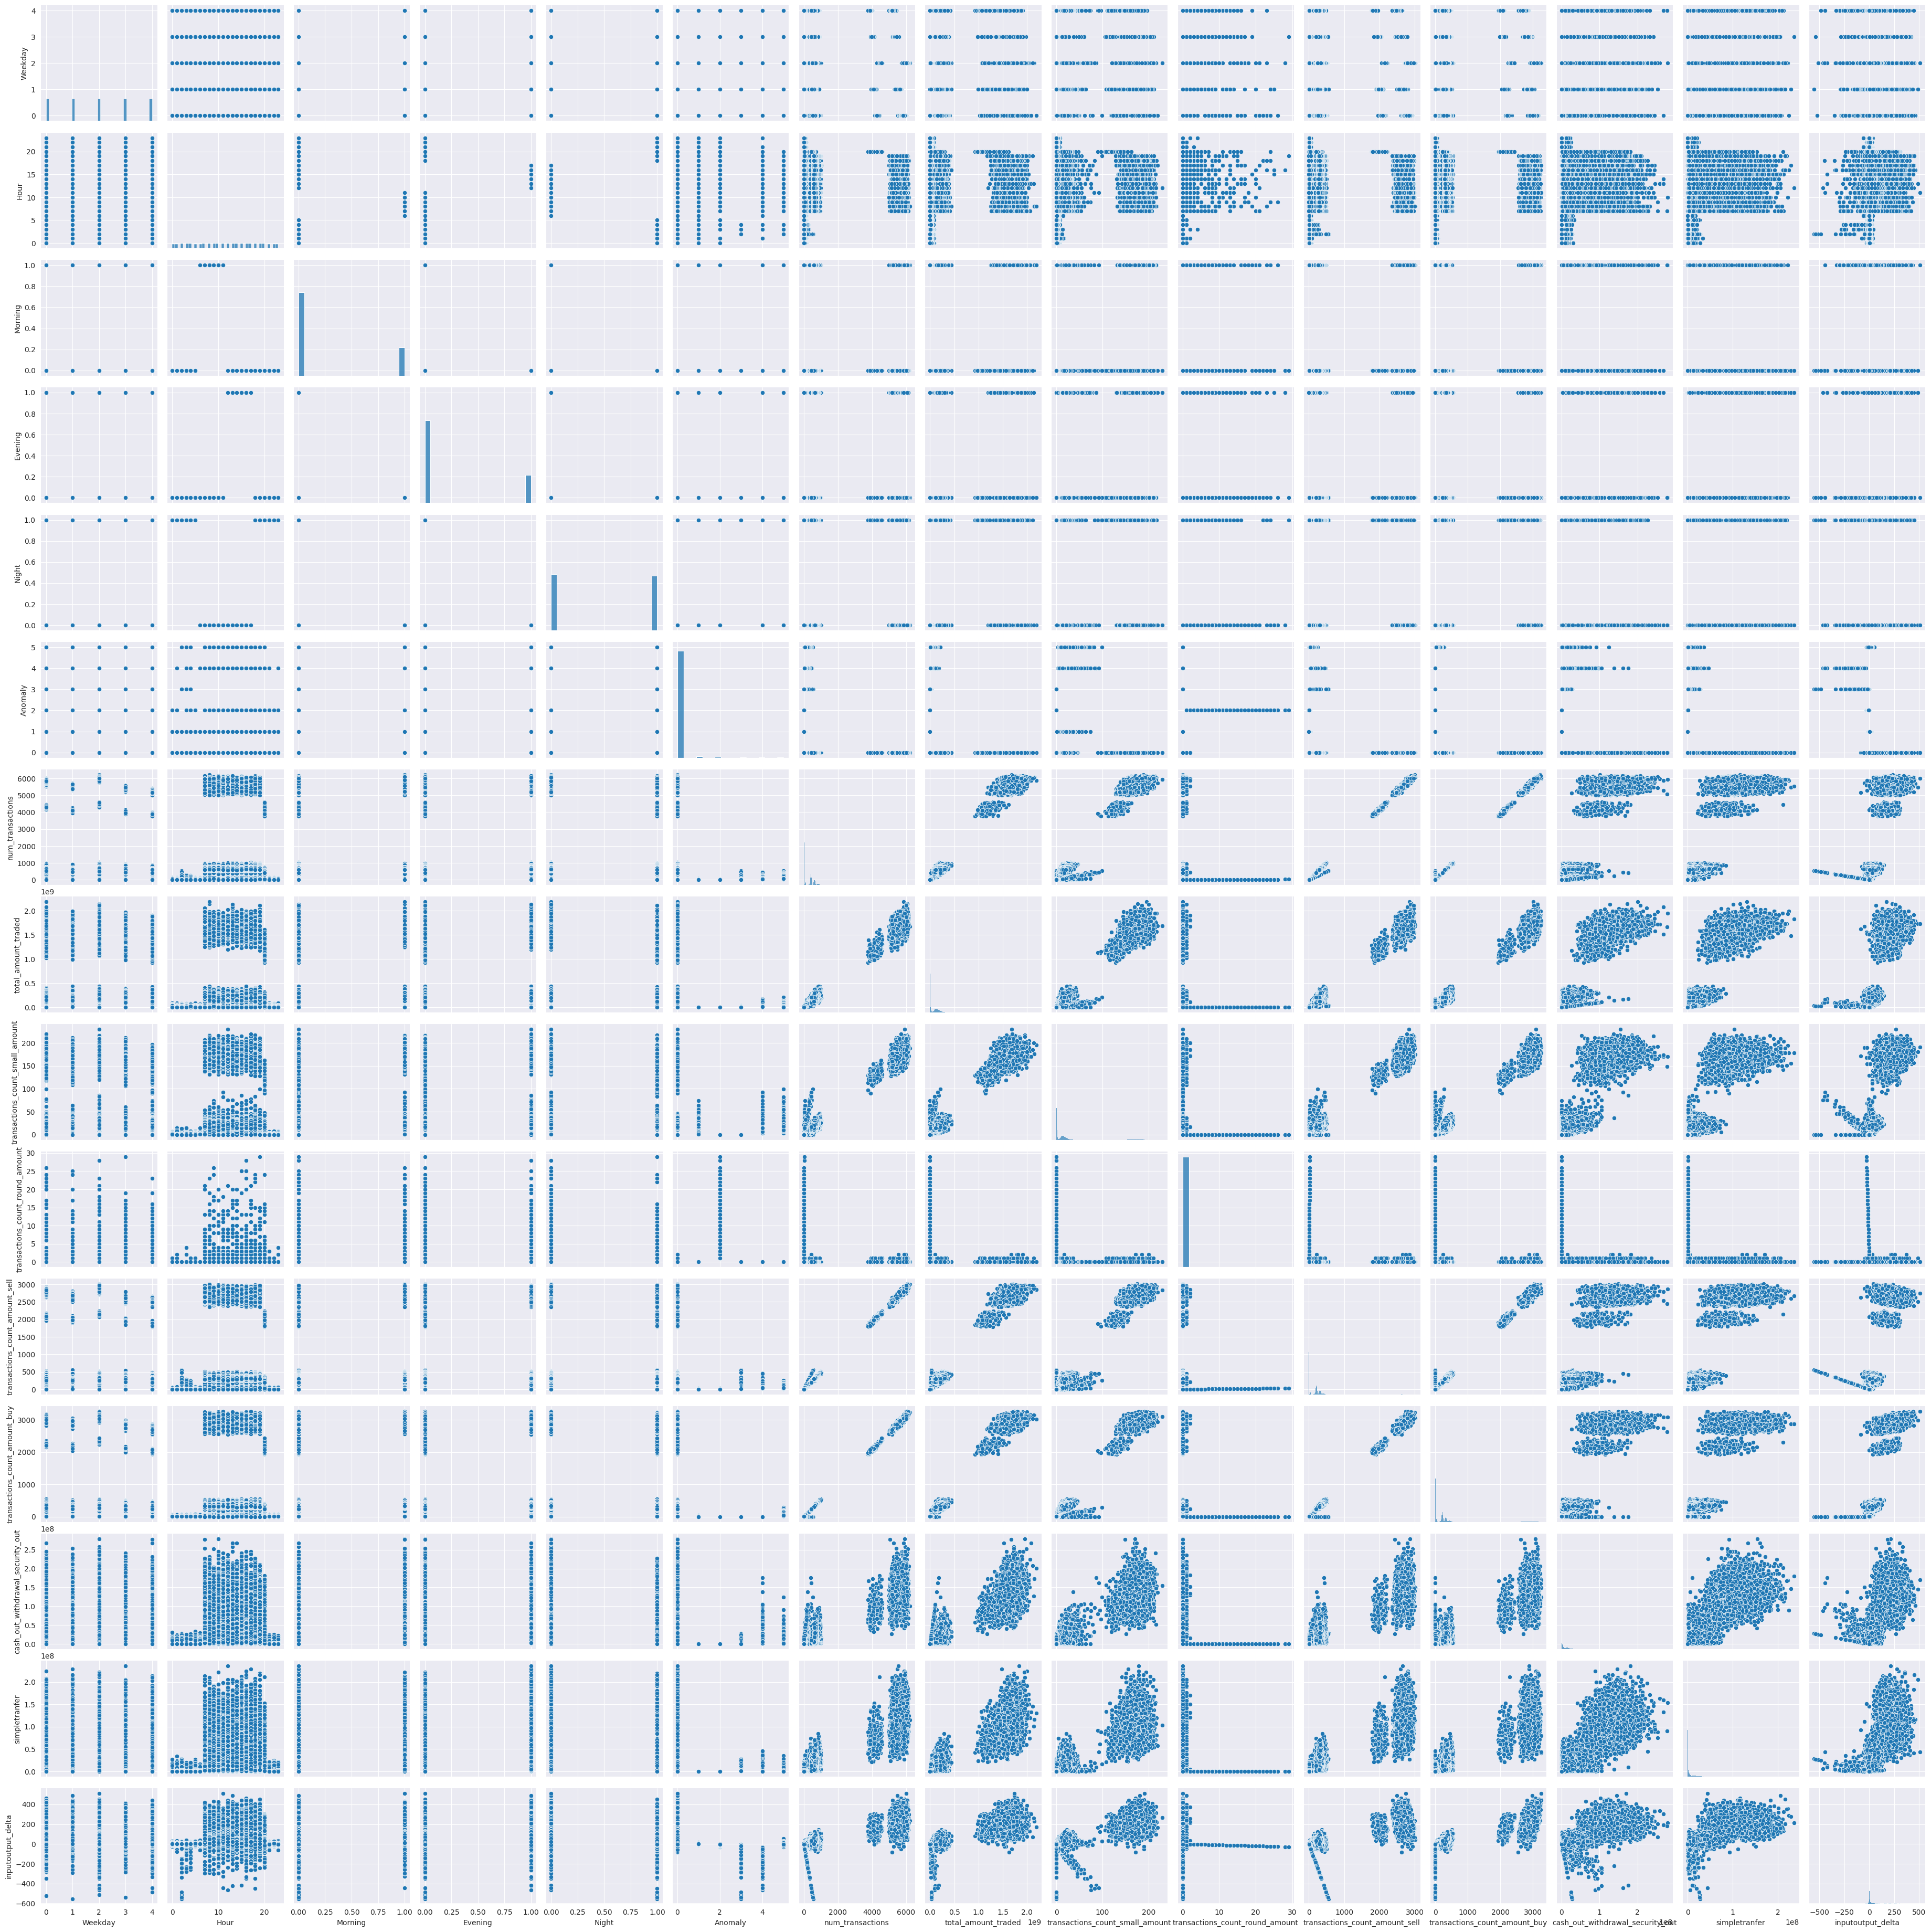

In [ ]:
sns.pairplot(aggregated_df)
plt.show()

In [ ]:
aggregated_df[aggregated_df['Anomaly']==1]

,Originator,Weekday,Hour,Morning,Evening,Night,Anomaly,num_transactions,total_amount_traded,transactions_count_small_amount,transactions_count_round_amount,transactions_count_amount_sell,transactions_count_amount_buy,cash_out_withdrawal_security_out,simpletranfer,inputoutput_delta
5293,Client_045,0,9,1,0,0,1,1,947.51,1,0,0,1,0.00,0.00,1
5328,Client_045,1,11,1,0,0,1,1,861.31,1,0,0,1,0.00,0.00,1
5338,Client_045,1,18,0,0,1,1,1,678.60,1,0,1,0,678.60,678.60,-1
5341,Client_045,1,20,0,0,1,1,9,7298.00,9,0,3,6,2515.63,2515.63,3
5356,Client_045,2,7,1,0,0,1,8,5883.36,8,0,5,3,3914.90,3914.90,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48582,Client_389,4,12,0,1,0,1,4,2926.91,4,0,2,2,1407.89,1407.89,0
48584,Client_389,4,13,0,1,0,1,1,780.10,1,0,1,0,780.10,780.10,-1
48587,Client_389,4,14,0,1,0,1,5,3797.62,5,0,3,2,2379.99,2379.99,-1
48589,Client_389,4,15,0,1,0,1,3,2687.67,3,0,1,2,950.59,950.59,1


In [ ]:
aggregated_df[aggregated_df['Anomaly']==2]

,Originator,Weekday,Hour,Morning,Evening,Night,Anomaly,num_transactions,total_amount_traded,transactions_count_small_amount,transactions_count_round_amount,transactions_count_amount_sell,transactions_count_amount_buy,cash_out_withdrawal_security_out,simpletranfer,inputoutput_delta
5295,Client_045,0,10,1,0,0,2,1,13000.0,0,1,1,0,13000.0,13000.0,-1
5321,Client_045,1,7,1,0,0,2,4,36000.0,0,4,4,0,36000.0,36000.0,-4
5324,Client_045,1,9,1,0,0,2,1,11000.0,0,1,1,0,11000.0,11000.0,-1
5326,Client_045,1,10,1,0,0,2,2,23000.0,0,2,2,0,23000.0,23000.0,-2
5334,Client_045,1,15,0,1,0,2,1,11000.0,0,1,1,0,11000.0,11000.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48554,Client_389,3,19,0,0,1,2,1,8000.0,0,1,1,0,8000.0,8000.0,-1
48574,Client_389,4,9,1,0,0,2,1,9000.0,0,1,1,0,9000.0,9000.0,-1
48578,Client_389,4,10,1,0,0,2,4,44000.0,0,4,4,0,44000.0,44000.0,-4
48580,Client_389,4,11,1,0,0,2,1,9000.0,0,1,1,0,9000.0,9000.0,-1


In [ ]:
aggregated_df[aggregated_df['Anomaly']==3]

,Originator,Weekday,Hour,Morning,Evening,Night,Anomaly,num_transactions,total_amount_traded,transactions_count_small_amount,transactions_count_round_amount,transactions_count_amount_sell,transactions_count_amount_buy,cash_out_withdrawal_security_out,simpletranfer,inputoutput_delta
5283,Client_045,0,2,0,0,1,3,9,453198.44,0,0,9,0,453198.44,453198.44,-9
5285,Client_045,0,3,0,0,1,3,6,282404.14,0,0,6,0,282404.14,282404.14,-6
5287,Client_045,0,4,0,0,1,3,1,35764.20,0,0,1,0,35764.20,35764.20,-1
5313,Client_045,1,2,0,0,1,3,5,313855.10,0,0,5,0,313855.10,313855.10,-5
5315,Client_045,1,3,0,0,1,3,4,202470.67,0,0,4,0,202470.67,202470.67,-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48533,Client_389,3,3,0,0,1,3,17,895915.18,0,0,17,0,895915.18,895915.18,-17
48535,Client_389,3,4,0,0,1,3,20,954689.23,0,0,20,0,954689.23,954689.23,-20
48563,Client_389,4,2,0,0,1,3,49,2491329.98,0,0,49,0,2491329.98,2491329.98,-49
48565,Client_389,4,3,0,0,1,3,16,786963.88,0,0,16,0,786963.88,786963.88,-16


In [ ]:
aggregated_df[aggregated_df['Anomaly']==4]

,Originator,Weekday,Hour,Morning,Evening,Night,Anomaly,num_transactions,total_amount_traded,transactions_count_small_amount,transactions_count_round_amount,transactions_count_amount_sell,transactions_count_amount_buy,cash_out_withdrawal_security_out,simpletranfer,inputoutput_delta
5299,Client_045,0,13,0,1,0,4,57,21320713.60,12,0,57,0,21320713.60,19557651.63,-57
5331,Client_045,1,13,0,1,0,4,124,24422331.57,21,0,124,0,24422331.57,1155369.23,-124
7135,Client_060,0,8,1,0,0,4,42,16313750.50,8,0,42,0,16313750.50,856992.03,-42
7900,Client_066,0,3,0,0,1,4,51,2393492.26,14,0,51,0,2393492.26,267371.76,-51
7910,Client_066,0,7,1,0,0,4,230,46475765.72,35,0,230,0,46475765.72,6623553.79,-230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48506,Client_389,2,11,1,0,0,4,50,18336005.94,14,0,50,0,18336005.94,282010.58,-50
48521,Client_389,2,18,0,0,1,4,57,13514489.07,13,0,57,0,13514489.07,45785.95,-57
48556,Client_389,3,20,0,0,1,4,35,18043327.04,7,0,35,0,18043327.04,918208.22,-35
48575,Client_389,4,9,1,0,0,4,66,22330415.17,14,0,66,0,22330415.17,179496.26,-66


In [ ]:
aggregated_df[aggregated_df['Anomaly']==5]

,Originator,Weekday,Hour,Morning,Evening,Night,Anomaly,num_transactions,total_amount_traded,transactions_count_small_amount,transactions_count_round_amount,transactions_count_amount_sell,transactions_count_amount_buy,cash_out_withdrawal_security_out,simpletranfer,inputoutput_delta
5360,Client_045,2,10,1,0,0,5,48,6650058.22,4,0,19,29,2049490.52,103280.21,10
5405,Client_045,3,18,0,0,1,5,41,16800412.84,11,0,23,18,1121898.84,586.39,-5
5424,Client_045,4,8,1,0,0,5,85,19169111.95,13,0,42,43,12052401.10,166962.47,1
7150,Client_060,0,16,0,1,0,5,52,16250397.73,9,0,22,30,660415.16,164351.89,8
7270,Client_060,4,8,1,0,0,5,71,26852990.46,14,0,40,31,21290393.70,92304.60,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48043,Client_385,4,18,0,0,1,5,104,22892068.97,21,0,46,58,3312336.57,127890.07,12
48421,Client_389,0,7,1,0,0,5,48,6948732.77,8,0,26,22,5849686.85,94137.81,-4
48446,Client_389,0,19,0,0,1,5,61,4010933.36,9,0,32,29,3079319.47,221979.41,-3
48499,Client_389,2,7,1,0,0,5,65,7515485.66,10,0,32,33,3264791.03,315524.13,1
